<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_Basic_Technical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#D E P R E C A T E D
Do not use this notebook
Updated version available at https://github.com/Praxis-QR/FDS/blob/main/FinTech_1_Technical_Analysis_NSE.ipynb

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [ ]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

Tested on  2023-12-01 14:50:31.224437+05:30
Python 3.10.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


#Getting Historical Stock Market Data / NSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm <br> For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>
![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/NSEHistoricData.png)<br>

Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0




##Load NSE Data in CSV format

In [ ]:
#NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm
#Sample Data on four companies are available here
!wget -O hdfc.csv 'https://drive.google.com/uc?export=download&id=1_-cuaL3KlSL2rlnjLkxENCItav_vr8ua' # HDFC Bank
!wget -O hulv.csv 'https://drive.google.com/uc?export=download&id=1EVInuQzPtUUGhOzkWO7ZGqoaX1uc6l2g' # Hindustan Unilever
!wget -O tata.csv 'https://drive.google.com/uc?export=download&id=18zpQLVB3mwy2SxUjDHr7Pnfu2vxjt65f' # Tata Steel
!wget -O lnto.csv 'https://drive.google.com/uc?export=download&id=1CQxXKFXZKDp0BHaiifY87-zM9ip3tpzt' # Larsen & Toubr

--2023-12-01 09:20:31--  https://drive.google.com/uc?export=download&id=1_-cuaL3KlSL2rlnjLkxENCItav_vr8ua
Resolving drive.google.com (drive.google.com)... 173.194.194.102, 173.194.194.101, 173.194.194.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nipbflv3n30lcfo0nrg3j5m9cfbm7tmh/1701422400000/15264228191300097767/*/1_-cuaL3KlSL2rlnjLkxENCItav_vr8ua?e=download&uuid=3bb7364f-99b2-49a9-9afc-3bf2e2a009ee [following]
--2023-12-01 09:20:31--  https://doc-00-5g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/nipbflv3n30lcfo0nrg3j5m9cfbm7tmh/1701422400000/15264228191300097767/*/1_-cuaL3KlSL2rlnjLkxENCItav_vr8ua?e=download&uuid=3bb7364f-99b2-49a9-9afc-3bf2e2a009ee
Resolving doc-00-5g-docs.googleusercontent.com (doc-00-5g-docs.googleusercontent.com)... 173.194.197.132, 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dfchk = pd.read_csv('hdfc.csv', delimiter = ',')
#dfchk = pd.read_csv(nseData, delimiter = ',')
dfchk.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFCBANK,EQ,26-Sep-2018,1952.40,1962.95,1978.00,1955.30,1966.05,1968.20,1966.04,3681681,7.238342e+09,145107
1,HDFCBANK,EQ,27-Sep-2018,1968.20,1969.40,1986.00,1955.15,1978.10,1976.15,1972.52,4588052,9.050041e+09,116913
2,HDFCBANK,EQ,28-Sep-2018,1976.15,1980.65,2015.45,1977.15,2008.50,2006.05,2002.53,3615179,7.239503e+09,106240
3,HDFCBANK,EQ,01-Oct-2018,2006.05,2009.80,2042.00,1997.80,2039.90,2035.45,2020.89,3112397,6.289803e+09,137110
4,HDFCBANK,EQ,03-Oct-2018,2035.45,2030.45,2052.20,2007.00,2031.00,2031.15,2030.01,3833037,7.781099e+09,186478


In [ ]:
#Check whether the CSV data has been loaded correctly or not

dfchk = pd.read_csv('lnto.csv', delimiter = ',')
dfchk.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,LT,EQ,26-Sep-2018,1319.05,1329.00,1336.8,1309.00,1335.1,1332.65,1321.51,2846089,3.761135e+09,112998
1,LT,EQ,27-Sep-2018,1332.65,1336.85,1337.0,1296.50,1312.5,1309.90,1312.74,3847372,5.050585e+09,110449
2,LT,EQ,28-Sep-2018,1309.90,1314.50,1316.7,1250.15,1275.3,1272.10,1281.09,4301355,5.510424e+09,181348
3,LT,EQ,01-Oct-2018,1272.10,1274.00,1274.0,1217.55,1251.0,1248.10,1236.67,4955435,6.128246e+09,209719
4,LT,EQ,03-Oct-2018,1248.10,1247.10,1262.0,1226.65,1248.0,1245.45,1242.06,4302314,5.343729e+09,228460


#Basic Charts

##One Company Data

In [ ]:
dfHDFC = pd.read_csv('hdfc.csv', delimiter = ',')
#dfHDFC.count()
dfHDFC.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFCBANK,EQ,26-Sep-2018,1952.40,1962.95,1978.00,1955.30,1966.05,1968.20,1966.04,3681681,7.238342e+09,145107
1,HDFCBANK,EQ,27-Sep-2018,1968.20,1969.40,1986.00,1955.15,1978.10,1976.15,1972.52,4588052,9.050041e+09,116913
2,HDFCBANK,EQ,28-Sep-2018,1976.15,1980.65,2015.45,1977.15,2008.50,2006.05,2002.53,3615179,7.239503e+09,106240
3,HDFCBANK,EQ,01-Oct-2018,2006.05,2009.80,2042.00,1997.80,2039.90,2035.45,2020.89,3112397,6.289803e+09,137110
4,HDFCBANK,EQ,03-Oct-2018,2035.45,2030.45,2052.20,2007.00,2031.00,2031.15,2030.01,3833037,7.781099e+09,186478


In [ ]:
#Number of trading days / data points
dfHDFC.count()

Symbol                   246
Series                   246
Date                     246
Prev Close               246
Open Price               246
High Price               246
Low Price                246
Last Price               246
Close Price              246
Average Price            246
Total Traded Quantity    246
Turnover                 246
No. of Trades            246
dtype: int64

<Axes: xlabel='Date'>

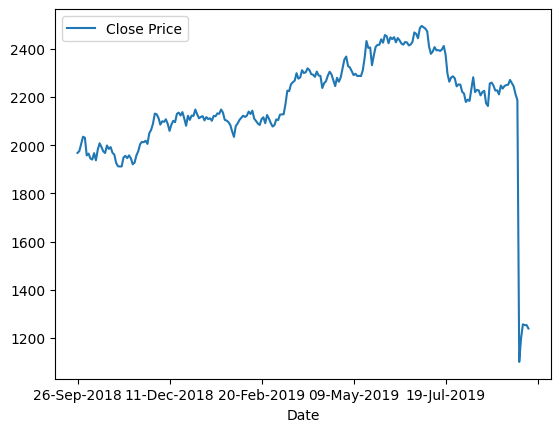

In [ ]:
dfHDFC.plot(kind='line',x='Date',y='Close Price')

In [ ]:
startDate = dfHDFC['Date'][dfHDFC.index[0]]
endDate = dfHDFC['Date'][dfHDFC.index[-1]]
print(startDate,endDate)

26-Sep-2018 25-Sep-2019


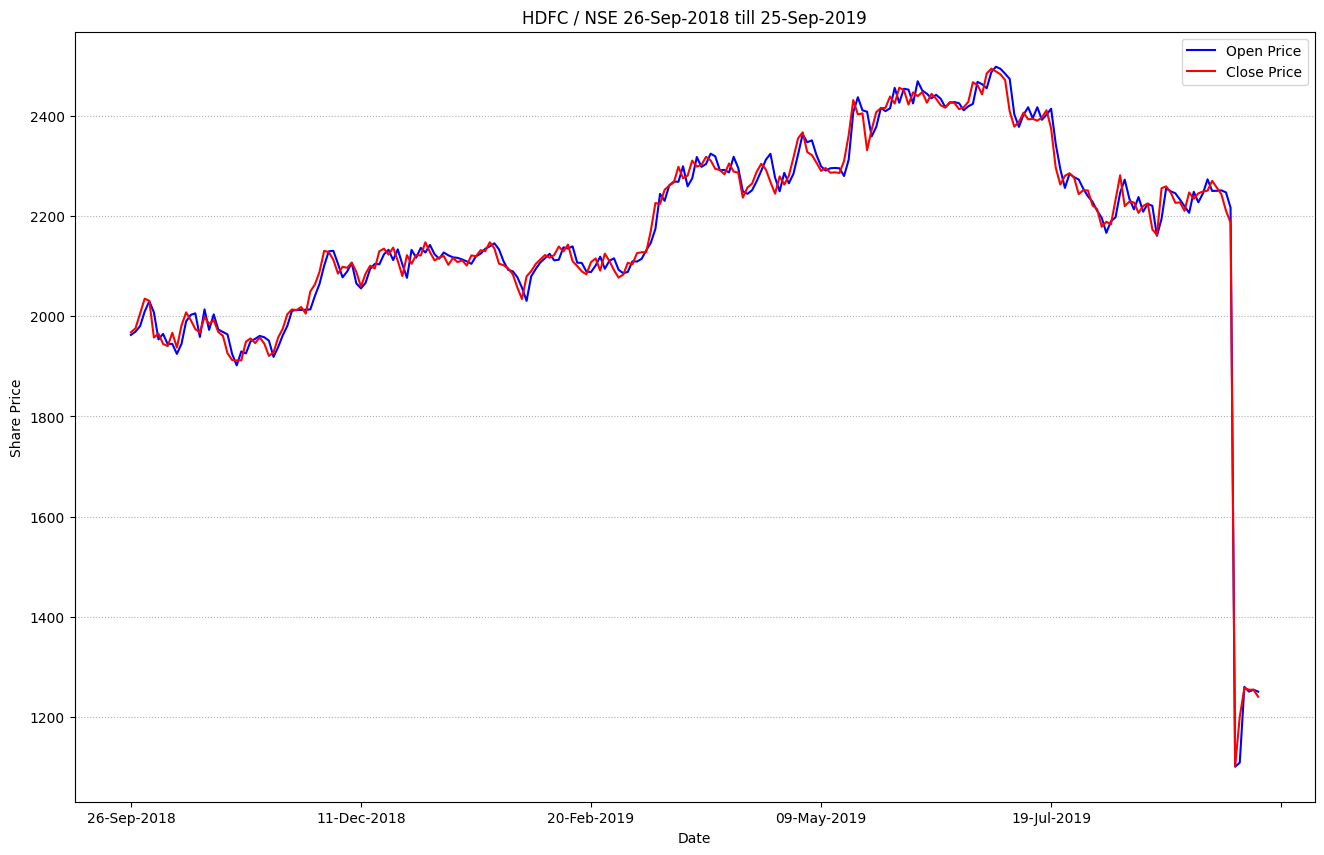

In [ ]:
# Plotting directly from DataFrames with Pandas
dfHDFC.plot(
    x='Date',
    y=['Open Price', 'Close Price'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC / NSE "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

Why did the HDFC Bank share price so much on 18th September ? [See](https://tradingqna.com/t/hdfc-bank-goes-ex-split-in-the-ratio-2-1-on-september-19-2019-here-s-how-it-impacts-your-equity-holdings-and-f-o-positions/63025)

##Compare Two Companies

In [ ]:
dfHDFC = pd.read_csv('hdfc.csv', delimiter = ',')
dfHDFC.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFCBANK,EQ,26-Sep-2018,1952.4,1962.95,1978.0,1955.30,1966.05,1968.20,1966.04,3681681,7.238342e+09,145107
1,HDFCBANK,EQ,27-Sep-2018,1968.2,1969.40,1986.0,1955.15,1978.10,1976.15,1972.52,4588052,9.050041e+09,116913


In [ ]:
dfHUL = pd.read_csv('hulv.csv', delimiter = ',')
dfHUL.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HINDUNILVR,EQ,26-Sep-2018,1630.85,1644.4,1649.0,1598.0,1610.0,1610.75,1610.72,980726,1.579677e+09,61278
1,HINDUNILVR,EQ,27-Sep-2018,1610.75,1610.0,1625.0,1603.2,1617.8,1620.10,1617.39,1572603,2.543507e+09,58406


In [ ]:
df2Com = pd.merge(dfHDFC[['Date','Close Price']],dfHUL[['Date','Close Price']],on='Date')
df2Com.head(2)

,Date,Close Price_x,Close Price_y
0,26-Sep-2018,1968.20,1610.75
1,27-Sep-2018,1976.15,1620.10


In [ ]:
df2Com = df2Com.rename(columns ={'Close Price_x':'HDFC','Close Price_y':'HUL'})
df2Com.head(2)

,Date,HDFC,HUL
0,26-Sep-2018,1968.20,1610.75
1,27-Sep-2018,1976.15,1620.10


In [ ]:
startDate = df2Com['Date'][dfHDFC.index[0]]
endDate = df2Com['Date'][dfHDFC.index[-1]]
print(startDate,endDate)

26-Sep-2018 25-Sep-2019


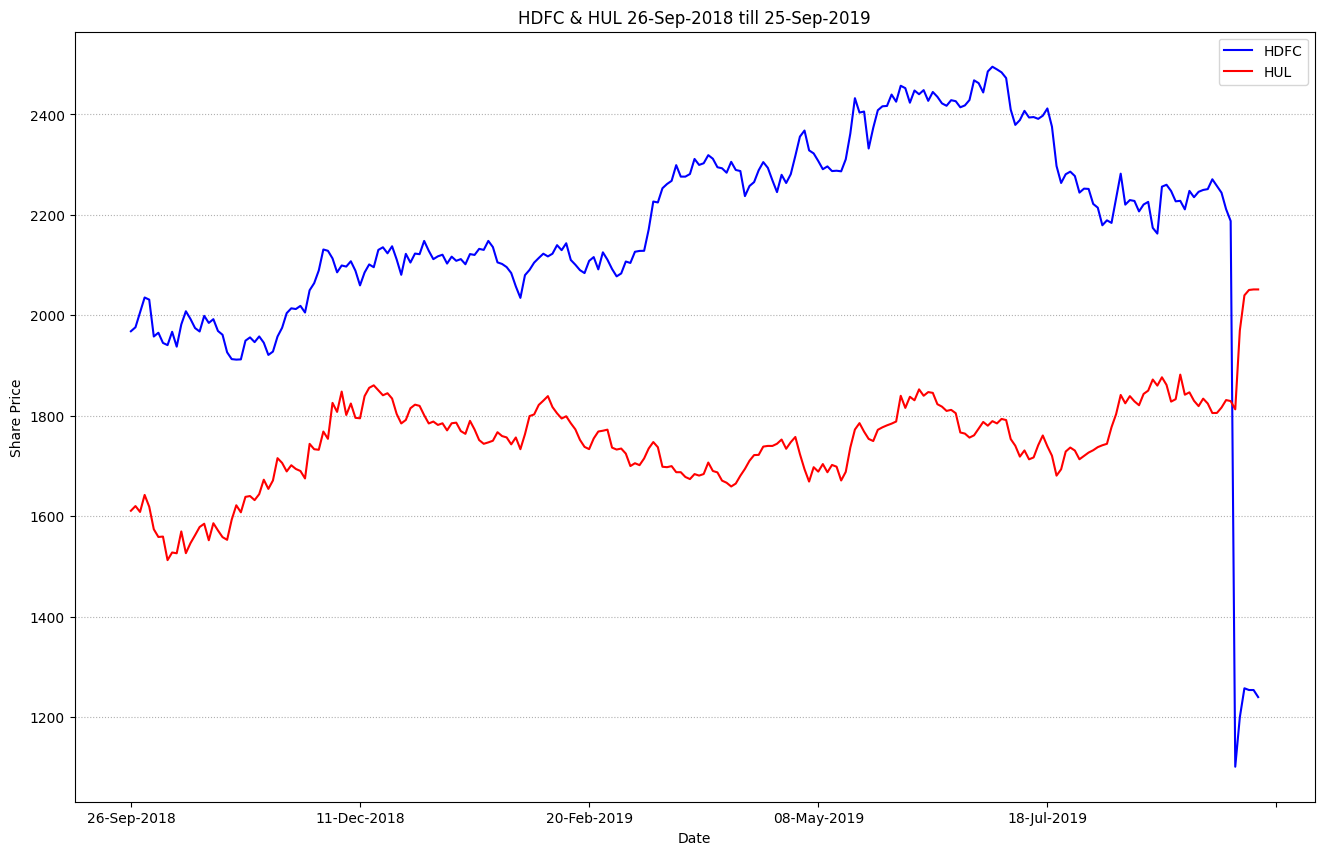

In [ ]:
# Plotting directly from DataFrames with Pandas
df2Com.plot(
    x='Date',
    y=['HDFC', 'HUL'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC & HUL "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

##Compare Three Companies

In [ ]:
dfLNTO = pd.read_csv('lnto.csv', delimiter = ',')
dfLNTO.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,LT,EQ,26-Sep-2018,1319.05,1329.00,1336.8,1309.0,1335.1,1332.65,1321.51,2846089,3.761135e+09,112998
1,LT,EQ,27-Sep-2018,1332.65,1336.85,1337.0,1296.5,1312.5,1309.90,1312.74,3847372,5.050585e+09,110449


In [ ]:
df3Com = pd.merge(df2Com[['Date','HDFC','HUL']],dfLNTO[['Date','Close Price']],on='Date')
df3Com.head(2)

,Date,HDFC,HUL,Close Price
0,26-Sep-2018,1968.20,1610.75,1332.65
1,27-Sep-2018,1976.15,1620.10,1309.90


In [ ]:
df3Com = df3Com.rename(columns ={'Close Price':'L&T'})
df3Com.head(2)

,Date,HDFC,HUL,L&T
0,26-Sep-2018,1968.20,1610.75,1332.65
1,27-Sep-2018,1976.15,1620.10,1309.90


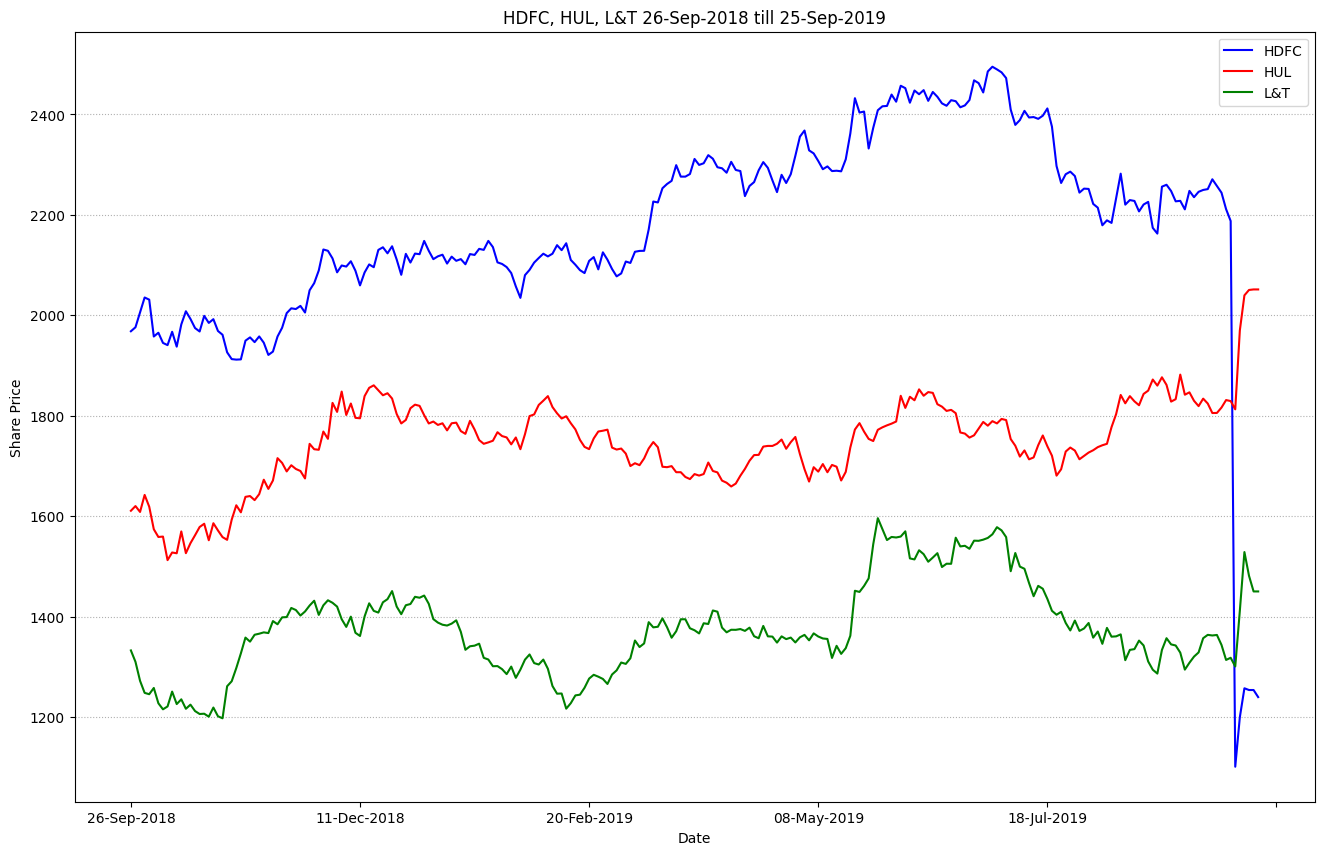

In [ ]:
# Plotting directly from DataFrames with Pandas
df3Com.plot(
    x='Date',
    y=['HDFC', 'HUL', 'L&T'],
    kind='line',
    legend=False,
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

#Scaling the Data

In [ ]:
df = df3Com.copy()
df.head()

,Date,HDFC,HUL,L&T
0,26-Sep-2018,1968.20,1610.75,1332.65
1,27-Sep-2018,1976.15,1620.10,1309.90
2,28-Sep-2018,2006.05,1608.40,1272.10
3,01-Oct-2018,2035.45,1642.30,1248.10
4,03-Oct-2018,2031.15,1618.85,1245.45


In [ ]:
df['HDFC'] = df['HDFC']/df['HDFC'][0]
df['HUL'] = df['HUL']/df['HUL'][0]
df['L&T'] = df['L&T']/df['L&T'][0]
df.head(10)

,Date,HDFC,HUL,L&T
0,26-Sep-2018,1.000000,1.000000,1.000000
1,27-Sep-2018,1.004039,1.005805,0.982929
2,28-Sep-2018,1.019231,0.998541,0.954564
3,01-Oct-2018,1.034168,1.019587,0.936555
4,03-Oct-2018,1.031984,1.005029,0.934566
5,04-Oct-2018,0.994691,0.977153,0.943909
6,05-Oct-2018,0.998527,0.967593,0.921022
7,08-Oct-2018,0.988213,0.968089,0.911980
8,09-Oct-2018,0.985977,0.938973,0.916257
9,10-Oct-2018,0.999467,0.948409,0.938468


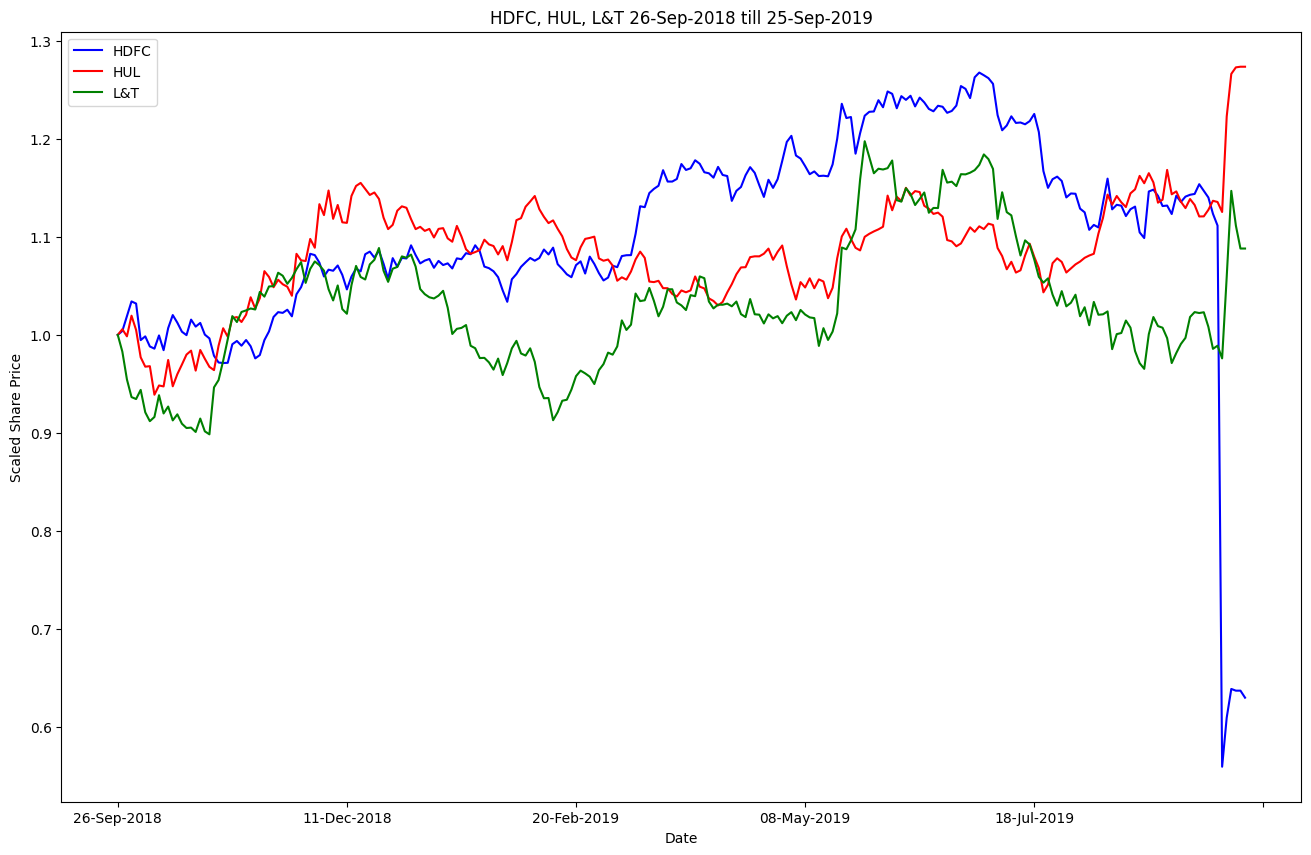

In [ ]:
# Plotting directly from DataFrames with Pandas
df.plot(
    x='Date',
    y=['HDFC', 'HUL', 'L&T'],
    kind='line',
    legend=False,
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Scaled Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()

#Simple Moving Average

In [ ]:
df = pd.read_csv('hulv.csv', delimiter = ',')
df.head(2)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HINDUNILVR,EQ,26-Sep-2018,1630.85,1644.4,1649.0,1598.0,1610.0,1610.75,1610.72,980726,1.579677e+09,61278
1,HINDUNILVR,EQ,27-Sep-2018,1610.75,1610.0,1625.0,1603.2,1617.8,1620.10,1617.39,1572603,2.543507e+09,58406


In [ ]:
#df.columns
dropCols = ['Symbol', 'Series',  'Prev Close', 'Last Price',  'Average Price', 'Turnover', 'No. of Trades']
df.drop(dropCols, axis=1, inplace=True)
df.head(3)

,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,26-Sep-2018,1644.4,1649.0,1598.00,1610.75,980726
1,27-Sep-2018,1610.0,1625.0,1603.20,1620.10,1572603
2,28-Sep-2018,1620.1,1627.3,1600.05,1608.40,1735076


In [ ]:
df.rename(columns={'Open Price':'Open','High Price':'Hign','Low Price':'Low','Close Price':'Close','Total Traded Quantity':'Volume'}, inplace=True)
df.head(3)

,Date,Open,Hign,Low,Close,Volume
0,26-Sep-2018,1644.4,1649.0,1598.00,1610.75,980726
1,27-Sep-2018,1610.0,1625.0,1603.20,1620.10,1572603
2,28-Sep-2018,1620.1,1627.3,1600.05,1608.40,1735076


In [ ]:
df.set_index('Date',inplace=True)
df.head(3)

,Open,Hign,Low,Close,Volume
Date,,,,,
26-Sep-2018,1644.4,1649.0,1598.00,1610.75,980726
27-Sep-2018,1610.0,1625.0,1603.20,1620.10,1572603
28-Sep-2018,1620.1,1627.3,1600.05,1608.40,1735076


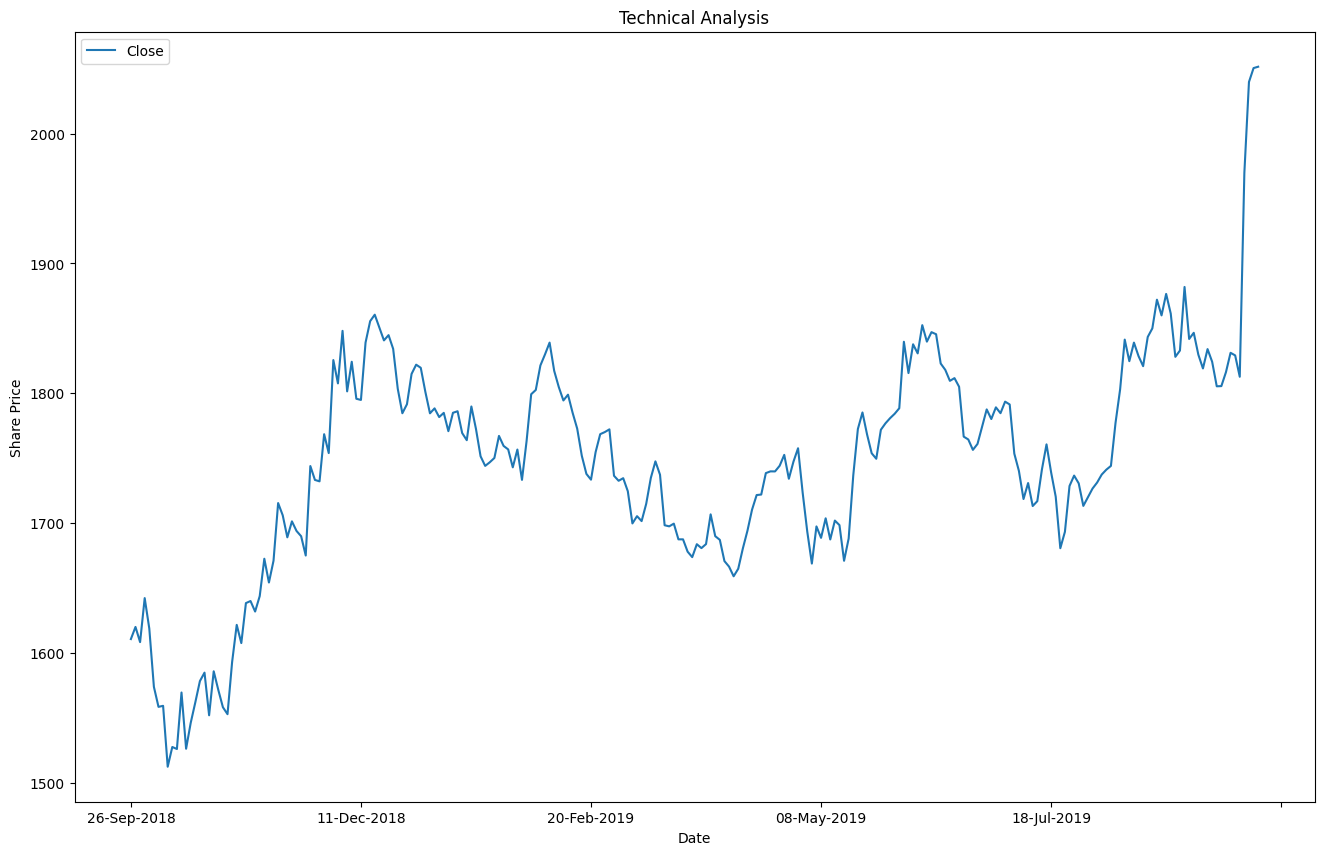

In [ ]:
df.plot(y='Close', figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

In [ ]:
df['SMA10'] = df['Close'].rolling(10).mean()
df['SMA30'] = df['Close'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

Open      246
Hign      246
Low       246
Close     246
Volume    246
SMA10     237
SMA30     217
dtype: int64

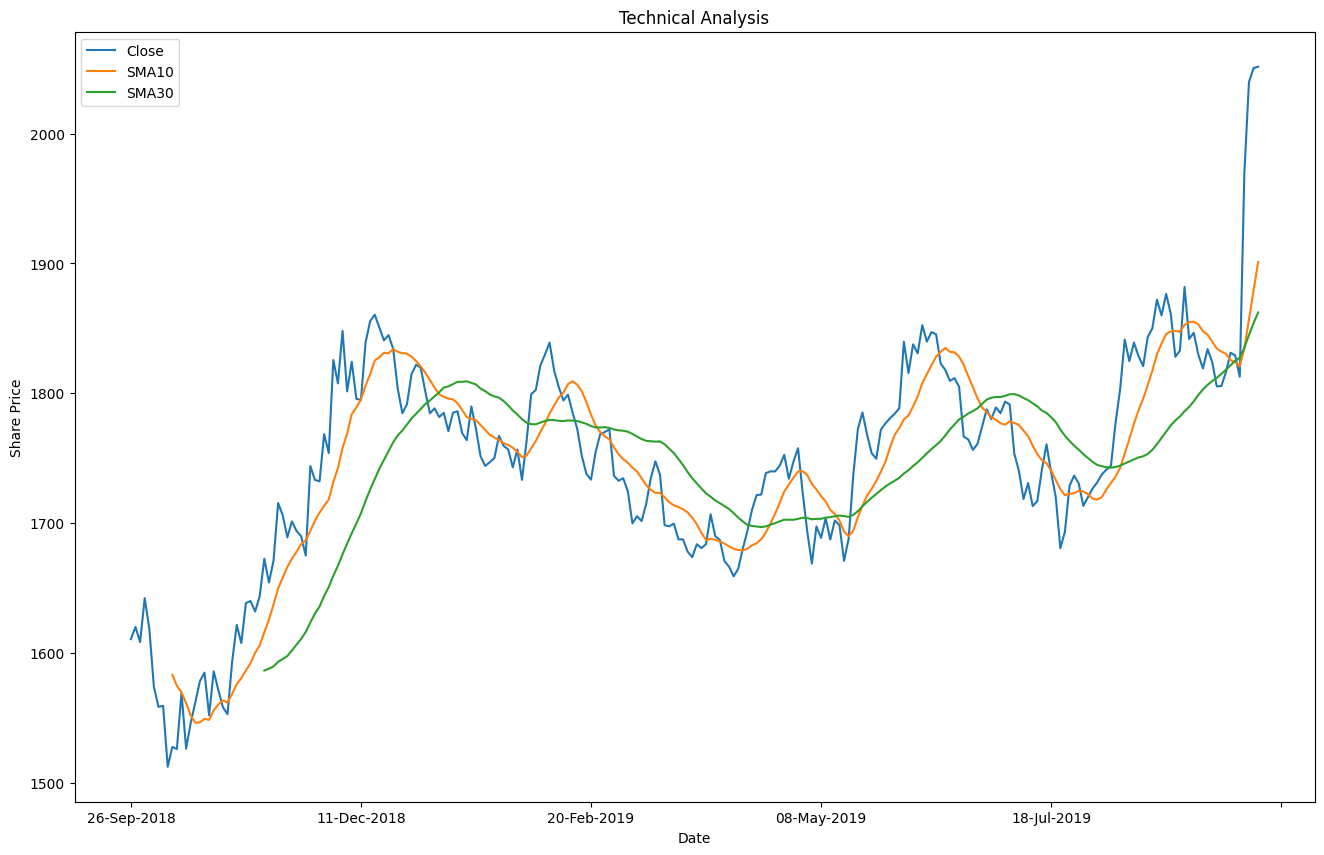

In [ ]:
df.plot(y=['Close','SMA10','SMA30'],
        figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

#Technical Charts

In [ ]:
!pip install mplfinance > /dev/null
import mplfinance as mpf

In [ ]:
df = pd.read_csv('hdfc.csv', delimiter = ',')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades
0,HDFCBANK,EQ,26-Sep-2018,1952.40,1962.95,1978.00,1955.30,1966.05,1968.20,1966.04,3681681,7.238342e+09,145107
1,HDFCBANK,EQ,27-Sep-2018,1968.20,1969.40,1986.00,1955.15,1978.10,1976.15,1972.52,4588052,9.050041e+09,116913
2,HDFCBANK,EQ,28-Sep-2018,1976.15,1980.65,2015.45,1977.15,2008.50,2006.05,2002.53,3615179,7.239503e+09,106240
3,HDFCBANK,EQ,01-Oct-2018,2006.05,2009.80,2042.00,1997.80,2039.90,2035.45,2020.89,3112397,6.289803e+09,137110
4,HDFCBANK,EQ,03-Oct-2018,2035.45,2030.45,2052.20,2007.00,2031.00,2031.15,2030.01,3833037,7.781099e+09,186478


In [ ]:
#list(df.columns)
drop_cols = ['Symbol', 'Series', 'Date', 'Prev Close',  'Last Price',   'Total Traded Quantity']
df.drop(dropCols,axis=1,inplace=True)
df.head(3)

,Date,Open Price,High Price,Low Price,Close Price,Total Traded Quantity
0,26-Sep-2018,1962.95,1978.00,1955.30,1968.20,3681681
1,27-Sep-2018,1969.40,1986.00,1955.15,1976.15,4588052
2,28-Sep-2018,1980.65,2015.45,1977.15,2006.05,3615179


In [ ]:
df.rename(columns={'Open Price':'Open','High Price':'High','Low Price':'Low','Close Price':'Close','Total Traded Quantity':'Volume'}, inplace=True)
df.head(3)

,Date,Open,High,Low,Close,Volume
0,26-Sep-2018,1962.95,1978.00,1955.30,1968.20,3681681
1,27-Sep-2018,1969.40,1986.00,1955.15,1976.15,4588052
2,28-Sep-2018,1980.65,2015.45,1977.15,2006.05,3615179


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.head(3)

,Date,Open,High,Low,Close,Volume
0,2018-09-26,1962.95,1978.00,1955.30,1968.20,3681681
1,2018-09-27,1969.40,1986.00,1955.15,1976.15,4588052
2,2018-09-28,1980.65,2015.45,1977.15,2006.05,3615179


In [ ]:
df.set_index('Date',inplace=True)
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2018-09-26,1962.95,1978.00,1955.30,1968.20,3681681
2018-09-27,1969.40,1986.00,1955.15,1976.15,4588052
2018-09-28,1980.65,2015.45,1977.15,2006.05,3615179


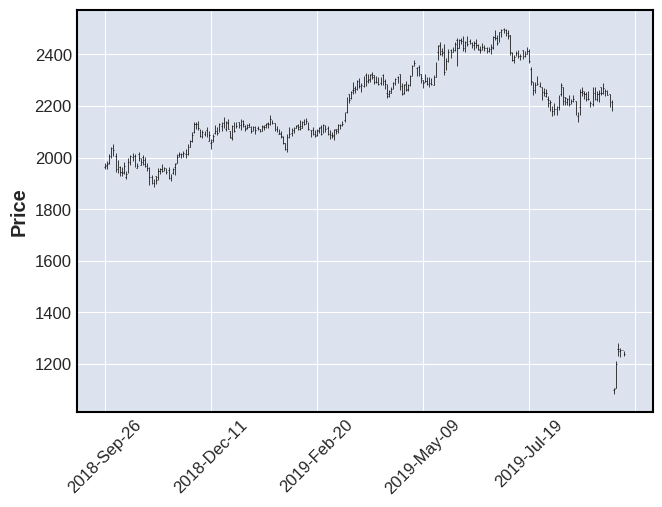

In [ ]:
#very basic usage
mpf.plot(df)

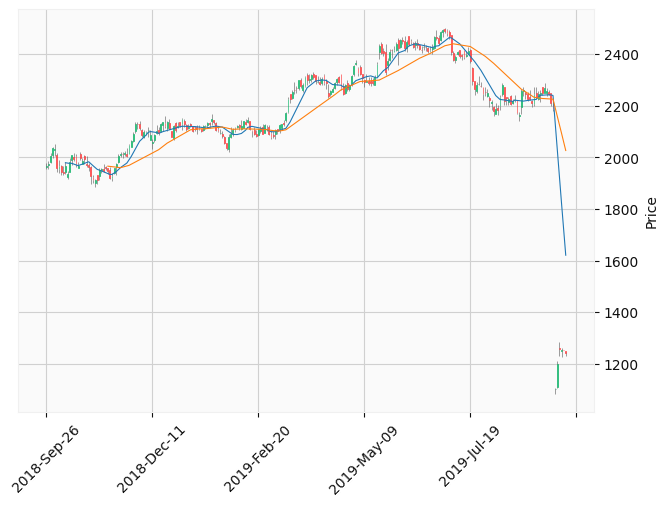

In [ ]:
#add moving average and candles
mpf.plot(df, type='candle',mav=(10,30), style='yahoo')

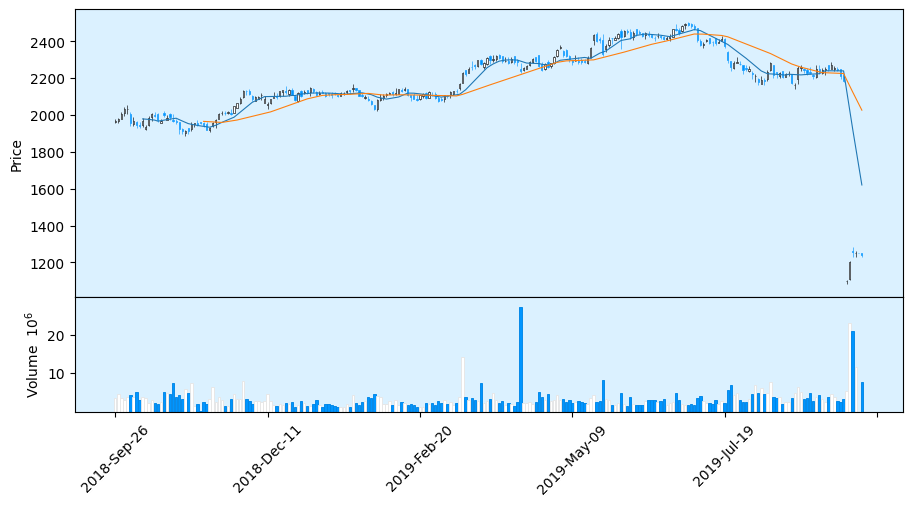

In [ ]:
#add volume
mpf.plot(df, type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

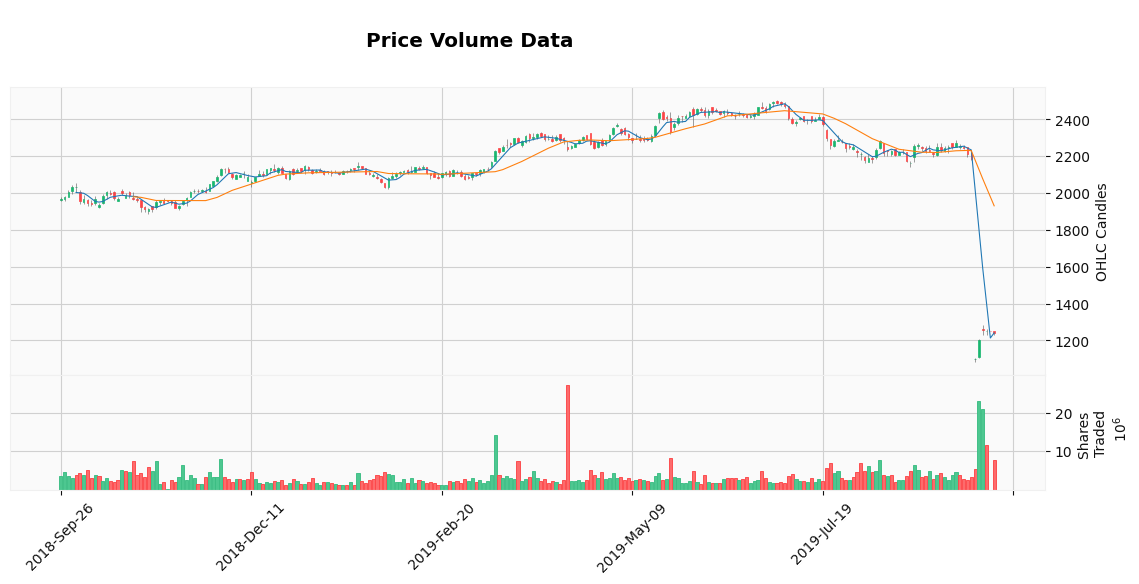

In [ ]:
mpf.plot(df, type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True,
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

#Exercise
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)